In [1]:
#Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#Read dataframe from preprocessing
data = pd.read_csv("Output/frame.csv",index_col=None, header=0,low_memory=False)
df = pd.DataFrame(data)

In [3]:
#Convert publish date to Timestamp
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [4]:
#Add time period column for analysis points of interest
before = (df['publish_date'] > pd.to_datetime('6/30/2015')) & (df['publish_date'] <= pd.to_datetime('3/1/2016')) 
during = (df['publish_date'] > pd.to_datetime('3/1/2016'))  & (df['publish_date'] <= pd.to_datetime('12/1/2016'))
after = (df['publish_date'] > pd.to_datetime('12/1/2016')) & (df['publish_date'] <= pd.to_datetime('6/30/2017'))
df.loc[before, "time_period"] = 'Pre-election'
df.loc[during, "time_period"] = 'Election season'
df.loc[after, "time_period"] = 'Post-election'

In [5]:
#Wish to strip the tweets from outside of our range of interest from the dataframe
df = df.dropna()
#dropna removes tweets that did not have a define region and those that were outside of the time period of interest

In [6]:
#Separate tweets that are english and non-english into their own dataframes
df_eng = pd.DataFrame(df.loc[df['language']== 'English'])
df_not_eng = pd.DataFrame(df.loc[df['language'] != 'English'])
num_eng = df_eng.count()[0]
num_not_eng = df_not_eng.count()[0]
print(f'The number of tweets in English were {num_eng}')
print(f'The number of tweets that were not in English were {num_not_eng}')

The number of tweets in English were 1641375
The number of tweets that were not in English were 744448


In [7]:
#Reset the index
df_eng = df_eng.reset_index(drop=True)

In [8]:
#Select account types of interest
right = df_eng['account_category'] == 'RightTroll'
left = df_eng['account_category'] == 'LeftTroll'
news = df_eng['account_category'] == 'NewsFeed'
hashtag = df_eng['account_category'] == 'HashtagGamer'
fearmonger = df_eng['account_category'] == 'Fearmonger'
df_troll = pd.DataFrame(df_eng.loc[right | left | news | hashtag | fearmonger])

In [9]:
#Reset the index
df_troll = df_troll.reset_index(drop=True)
Troll_tweets = df_troll['account_category'].value_counts()
df_troll['account_category'].value_counts()
Troll_tweets = Troll_tweets.reset_index()
Troll_tweets

,index,account_category
0,NewsFeed,531541
1,RightTroll,387238
2,LeftTroll,367978
3,HashtagGamer,210177
4,Fearmonger,9858


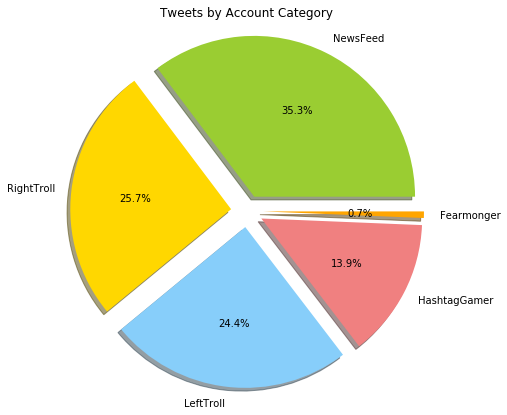

In [10]:

fig4 = plt.figure(figsize=(7,7))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange']
Troll_tweets = df_troll['account_category'].value_counts()
Troll_tweets = Troll_tweets.reset_index()


labels = Troll_tweets['index']
plt.pie(Troll_tweets['account_category'], labels=labels, startangle=0, explode=(0.1, 0.1, 0.1, 0.1, 0.1 ), shadow=True, autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.tight_layout
plt.title("Tweets by Account Category")

fig4.savefig("AccountCatPie.png", bbox_inches='tight')

In [11]:
#Find logical index of each category for .loc
right = df_troll['account_category'] == 'RightTroll'
left = df_troll['account_category'] == 'LeftTroll'
news = df_troll['account_category'] == 'NewsFeed'
hashtag = df_troll['account_category'] == 'HashtagGamer'
fearmonger = df_troll['account_category'] == 'Fearmonger'

troll_fear = pd.DataFrame(df_troll.loc[fearmonger])
troll_fear = troll_fear.reset_index(drop=True)

troll_hashtag = pd.DataFrame(df_troll.loc[hashtag])
troll_hashtag = troll_hashtag.reset_index(drop=True)

troll_news = pd.DataFrame(df_troll.loc[news])
troll_news = troll_news.reset_index(drop=True)

troll_left = pd.DataFrame(df_troll.loc[left])
troll_left = troll_left.reset_index(drop=True)

troll_right = pd.DataFrame(df_troll.loc[right])
troll_right = troll_right.reset_index(drop=True)

In [12]:
#find number of authors for each category
fear_nauthors = troll_fear['author'].nunique()
hashtag_nauthors = troll_hashtag['author'].nunique()
news_nauthors = troll_news['author'].nunique()
left_nauthors = troll_left['author'].nunique()
right_nauthors = troll_right['author'].nunique()
print(f"The number of fearmongers was {fear_nauthors}.\nThe number of hashtagers was {hashtag_nauthors}. \
\nThe number of news linkers was {news_nauthors}.\nThe number of left trolls was {left_nauthors}.\
\nThe number of right trolls was {right_nauthors}")

The number of fearmongers was 121.
The number of hashtagers was 111. 
The number of news linkers was 53.
The number of left trolls was 224.
The number of right trolls was 424


In [13]:
Troll_accounts = df_troll.groupby('account_category').nunique()['author']
Troll_accounts = Troll_accounts.reset_index()
Troll_accounts

,account_category,author
0,Fearmonger,121
1,HashtagGamer,111
2,LeftTroll,224
3,NewsFeed,53
4,RightTroll,424


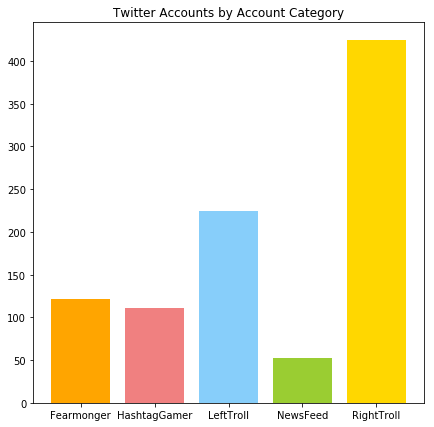

In [14]:

fig5 = plt.figure(figsize=(7,7))
colorbar = ['orange', 'lightcoral', 'lightskyblue', 'yellowgreen', 'gold']
plt.bar(Troll_accounts['account_category'], Troll_accounts['author'], color=colorbar,align="center")

plt.tight_layout
plt.title("Twitter Accounts by Account Category")

fig5.savefig("AccountTypeBar.png", bbox_inches='tight')

In [15]:
#Find the number of authors for each category
fear_ntweets = troll_fear['author'].count()
hashtag_ntweets = troll_hashtag['author'].count()
news_ntweets = troll_news['author'].count()
left_ntweets = troll_left['author'].count()
right_ntweets = troll_right['author'].count()
print(f"There were {fear_ntweets} fearmonger account tweets. \
\nThere were {hashtag_ntweets} hashtag account tweets. \
\nThere were {news_ntweets} news account tweets. \
\nThere were {left_ntweets} left account tweets. \
\nThere were {right_ntweets} right account tweets.")

There were 9858 fearmonger account tweets. 
There were 210177 hashtag account tweets. 
There were 531541 news account tweets. 
There were 367978 left account tweets. 
There were 387238 right account tweets.


In [16]:
#Find the average tweets per author for each category
avg_fear = round(fear_ntweets / fear_nauthors)
avg_hashtag = round(hashtag_ntweets / hashtag_nauthors)
avg_news = round(news_ntweets / news_nauthors)
avg_left = round(left_ntweets / left_nauthors)
avg_right = round(right_ntweets / right_nauthors)
print(avg_fear)
print(avg_hashtag)
print(avg_news)
print(avg_left)
print(avg_right)

81.0
1893.0
10029.0
1643.0
913.0


In [17]:
#Create dataframe to collect number of tweets of each account and their account type
df_box = pd.DataFrame(df_troll.groupby(['author','account_category']).count()['external_author_id'])
df_box = df_box.reset_index()
df_box = df_box.rename(columns={'author':'Author',
                                'account_category':'Account Type',
                                'external_author_id':'Number of Tweets'
                               })
df_box.head()

,Author,Account Type,Number of Tweets
0,1D_NICOLE_,Fearmonger,6
1,1ERIK_LEE,RightTroll,2
2,2NDHALFONION,RightTroll,3
3,4EVER_SUSAN,RightTroll,62
4,4MYSQUAD,LeftTroll,4767


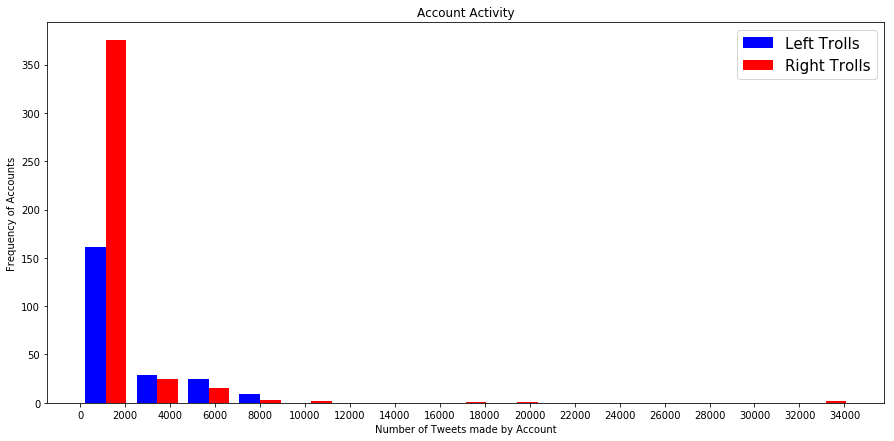

In [18]:
#Wish to make a histogram to observe the total activity of each troll account.
#Create logical expressions for later .loc
right = df_box['Account Type'] == 'RightTroll'
left = df_box['Account Type'] == 'LeftTroll'
left_tweets = df_box.loc[left]['Number of Tweets']
right_tweets = df_box.loc[right]['Number of Tweets']
#assign number of tweets in rows within columns by account type. 
data_hist = [left_tweets,right_tweets]
fig, axs = plt.subplots(1, 1, figsize = (15,7))
#use matplotlib.pyplot.subplots() to create empty subplot for display of histogram
n_bins = 15
colors = ['blue','red']
labels = ['Left Trolls', 'Right Trolls']

axs.hist(data_hist, n_bins,color = colors, label= labels)
axs.legend(prop={'size': 15})
axs.set_title('Account Activity')
axs.set_xlabel('Number of Tweets made by Account')
axs.set_ylabel('Frequency of Accounts')
axs.set_xticks(np.arange(0,35000,2000))
fig.savefig("Account Activity.png", bbox_inches='tight')

In [19]:
#df_box.groupby("Account Type").quantile([0, 0.25, 0.5, 0.75, 1])

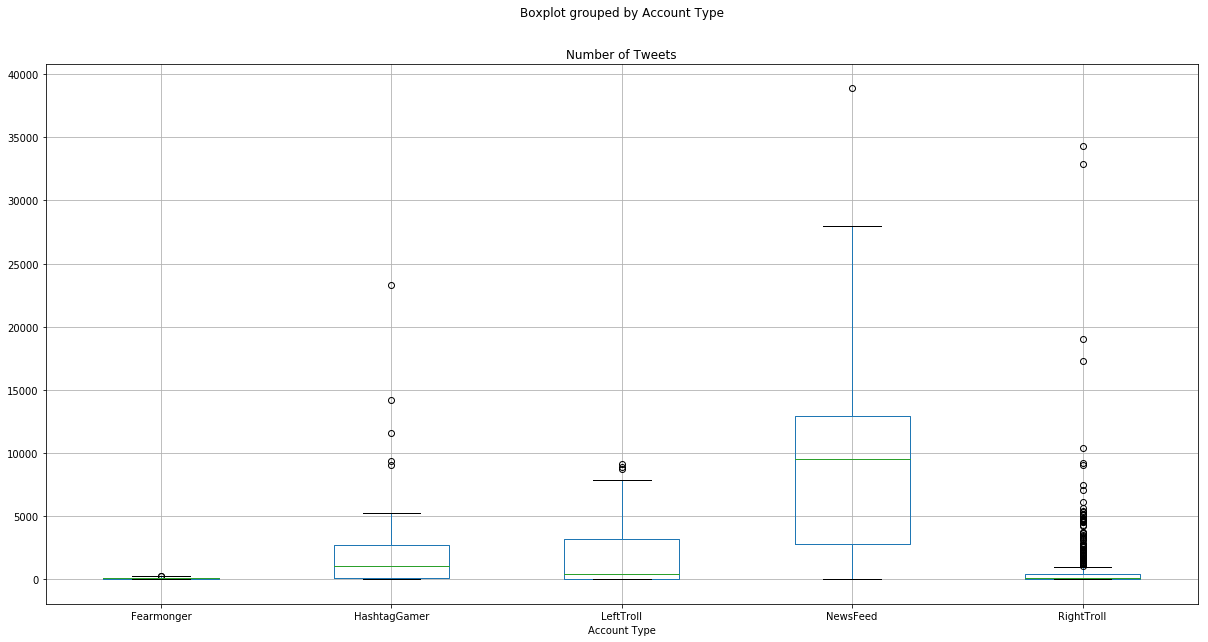

In [20]:
# Create a boxplot to compare means
df_box.boxplot("Number of Tweets", by="Account Type", figsize=(20, 10))

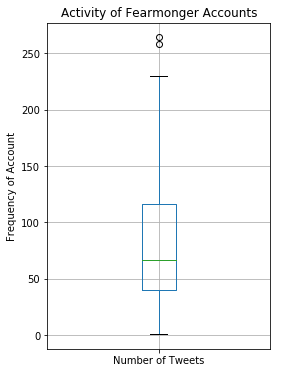

In [21]:
# Create a boxplot to compare means
boxplot = df_box.loc[df_box['Account Type'] == 'Fearmonger'].boxplot("Number of Tweets", figsize=(4, 6))
boxplot.set_title('Activity of Fearmonger Accounts')
boxplot.set_ylabel('Frequency of Account')
fig2 = boxplot.get_figure()
fig2.savefig("Fearmonger Boxplot.png", bbox_inches='tight')

In [22]:
#Wish to look at account activity for during election
df_box_election = pd.DataFrame(df_troll.loc[df_troll['time_period']=='Election season'].groupby(['author','account_category']).count()['external_author_id'])
df_box_election = df_box_election.reset_index()
df_box_election = df_box_election.rename(columns={'author':'Author',
                                'account_category':'Account Type',
                                'external_author_id':'Number of Tweets'
                                                })
df_box_election.head(5)
#this dataframe holds the number of tweets each author made during the time period we defined as election season.
#this dataframe also allows us to groupby account type.

,Author,Account Type,Number of Tweets
0,4EVER_SUSAN,RightTroll,21
1,4MYSQUAD,LeftTroll,406
2,AANTIRACIST,LeftTroll,960
3,ABIGAILSSILK,HashtagGamer,333
4,ABOUTPOLIT,LeftTroll,71


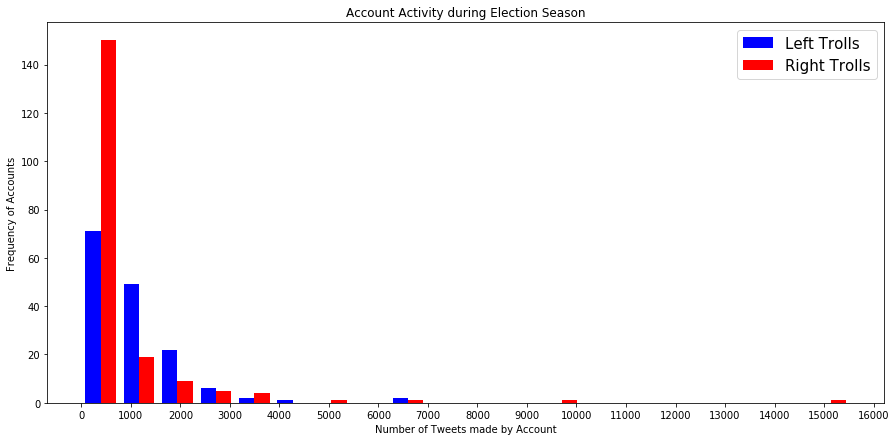

In [23]:
#Create histogram to look at account activity durring election season.
#ASsign logicals to fill list with .loc
right = df_box_election['Account Type'] == 'RightTroll'
left = df_box_election['Account Type'] == 'LeftTroll'
left_tweets = df_box_election.loc[left]['Number of Tweets']
right_tweets = df_box_election.loc[right]['Number of Tweets']
data_hist = [left_tweets,right_tweets]
fig3, axs2 = plt.subplots(1, 1, figsize = (15,7))

n_bins = 20
colors = ['blue','red']
labels = ['Left Trolls', 'Right Trolls']

axs2.hist(data_hist, n_bins,color = colors, label= labels)
axs2.legend(prop={'size': 15})
axs2.set_title('Account Activity during Election Season')
axs2.set_xlabel('Number of Tweets made by Account')
axs2.set_ylabel('Frequency of Accounts')
axs2.set_xticks(np.arange(0,17000,1000))
fig3.savefig("Account Activity Election Season.png", bbox_inches='tight')